# 8 - Solving Ordinary Differential Equations (ODEs)<br>*(Ch. 8.1-8.2)*

## Differential equations are ubiquitous in physics.
Differential equations come in two main types: ordinary differential equations (ODEs) and partial differential equations (PDEs). We encountered differential equations as early as in PHY 111, as Newton's second law in one dimension can be written as
\begin{equation*}
    \frac{d^2 x}{dt^2}=\frac{F_{net}}{m}.
\end{equation*}
Differential equations are also found in quantum mechanics (Schr&ouml;dinger equation), wave equations, electricity and magnetism, electronics, etc.

While some differential equations can be solved analytically, others cannot be. It is in these situations that numerical methods really shine.

<br><br><br><br><br><br><br><br><br><br><br><br>
## Example: Ball in free-fall
Last time, we examined a vpython code that allowed us to visualize a bouncing ball under the influence of gravity. The code is below. We used the equations 
\begin{equation*}
    \Delta y = v\Delta t,\ \ \Delta v = a\Delta t
\end{equation*} 
which can be re-organized into the following differential equations: 
\begin{equation*}
    \frac{dy}{dt}=v,\ \ \frac{dv}{dt}=-g
\end{equation*}

While the differential equations for this free-fall problem can be solved analytically in this scenario, we're going to examine numerical techniques to see how well they can accomplish the same task.

In [ ]:
#
# Program 2.1: A bouncing ball (bouncing_ball.py)
# J Wang, Computational modeling and visualization with Python
#

import vpython as vp     # get VPython modules for animation
scene = vp.canvas() # Needed to start a new Vpython display for the current code cell

# draw the ball at (0,5,0) and a thin floor at (0,-5,0)
ball = vp.sphere(pos=vp.vector(0,5,0), radius=1, color=vp.color.yellow) # ball  
floor = vp.box(pos=vp.vector(0,-5,0), length=8, height=0.2, width=4)    # floor 

dt = 0.005            # time step size                        
v = 0.0             # initial velocity                      
while True:         # loop forever
    vp.rate(200)    # limit animation rate to 200 loops/sec 
    ball.pos.y = ball.pos.y + v*dt       # update y position 
    if ball.pos.y > floor.pos.y + ball.radius:  
        v = v - 9.8*dt       # above floor, update velocity  
    else:                               
        v = - v             # below floor, reverse velocity 

<br><br><br><br><br><br><br><br><br><br><br><br>
## Euler's method
Let's assume we have a generic ODE given by
\begin{equation*}\frac{\mathrm{d}x}{\mathrm{d}t}=f(x,t)\end{equation*}
and that we would like to find a solution $x(t)$ given initial conditions (e.g. value of $x$ at $t=0$).

To develop this method, we will look at a Taylor expansion 
\begin{equation*}
    x(t+h) = x(t) + h\frac{\mathrm{d}x}{\mathrm{d}t} + \frac{1}{2}h^2\frac{\mathrm{d}^2x}
    {\mathrm{d}t^2}+\cdots = x(t) + hf(x,t)+O(h^2)
\end{equation*} 
where $h$ is the time interval between the old and new values of $x$.

If $h$ is very small, we can neglect the higher order terms and obtain (to very good approximation)
\begin{equation*}
    x(t+h) = x(t) + hf(x,t).
\end{equation*}




## Qualitative picture
So, if we're given an initial condition, we now have an iterative equation that can be used to plot our function $x(t)$. The idea behind Euler's method is to consider the slope of the function at $x$ and extrapolate it to the position $(x,h)$ as shown in the figure.

![](images/EulerMethod.png)


<br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## Use Euler method to describe free-fall motion
The Euler method can be use to solve for $y(t)$ numerically based on the following differential equation \begin{equation*}
    \frac{\mathrm{d}y}{\mathrm{d}t}=v_{0y}+a_y (t-t_0).
\end{equation*}
Use the following recipe to advance from $(t_{i-1})$ to $t_i$:
\begin{equation*} v_{y,i} = v_0 + ay*(t_i-t_0) \mathrm{\ (exact\ expression)}\end{equation*}
\begin{equation*} t_i = t_{i-1} + \Delta t \end{equation*}
\begin{equation*} y_i = y_{i-1} + v_{y,i-1} \Delta t \end{equation*}
This last equation is equivalent to the $x(t+h) = x(t) + hf(x,t)$ step from above. 

***Note:*** We are going to 'cheat' here a bit and use the analytic solution for velocity so that we're only worrying about a single differential equation that we need to solve. We'll revisit this and perform the calculation correctly soon.

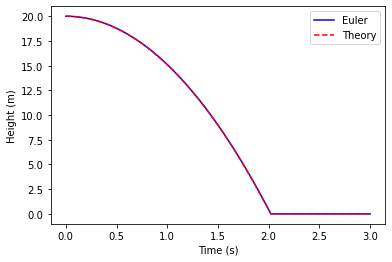

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def v(y,t):
    fy = v0 + ay*(t-t0)
    return fy

# Defining simulation parameters
y0 = 20.0 # initial y in meters
v0 = 0.0 # m/s
ay = -9.8 # m/s^2
t0 = 0.0
tf = 3.0
h = 0.002 # timestep in seconds

# Establish data containers
tpoints = np.arange(t0,tf+h,h)
ypoints = []

# Initialize loop variables
y = y0

# Euler method
for t in tpoints:
    ypoints.append(y)
    y += h*v(y,t) # Euler method
    if y<0:
        y = 0

# Theoretical solution
yth = y0 + v0*(tpoints-t0) + 0.5*ay*(tpoints-t0)**2
yth[yth<0]=0

# Plot data
plt.plot(tpoints,ypoints,'b',label='Euler')
plt.plot(tpoints,yth,'r--',label='Theory')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.legend()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
Pre-generated solution:

In [ ]:
# Using Numpy arrays
import numpy as np
import matplotlib.pyplot as plt

# Variables defined before the function definition are available to both the main program and the function
y0 = 0.0
t0 = 0.0
tf = 1.1
vy0 = 5.0
ay = -9.8
dt = 0.02 # time step in seconds

def velocity(y,t): # This is the function representing the ODE we're trying to solve
    return vy0 + ay*(t-t0)

N = int(np.round((tf-t0)/dt)) # number of time steps

yarr = np.zeros(N)
tarr = np.zeros(N)

tarr[0] = t0
yarr[0] = y0

for i in range(1,N):
    tarr[i] = tarr[i-1]+dt # Advance time by dt
    yarr[i] = yarr[i-1]+dt*velocity(yarr[i-1],tarr[i-1]) # Generic x(t+delta_t)=x(t)+h*f(x,t) step
    if yarr[i]<0: # Keep object from dropping through the ground
        yarr[i]=0

#Calculate exact solution for comparison
y_th=vy0*tarr+0.5*ay*tarr**2
y_th[y_th<0]=0
        
plt.plot(tarr,yarr)
plt.plot(tarr,y_th,'--')
plt.legend(['Euler','Exact'])
plt.xlabel('Time (s)')
plt.ylabel('Y Position (m)')  

In [ ]:
# Using lists
import numpy as np
import matplotlib.pyplot as plt

def velocity(y,t): # This is the function representing the ODE we're trying to solve
    return vy0 + ay*(t-t0)

# Variables defining simulation parameters
y0 = 0.0
t0 = 0.0
tf = 1.1
vy0 = 5.0
ay = -9.8
h = 0.02 # time step in seconds

# Define data containers
tarr = np.arange(t0,tf+h,h)
yarr = []

# initialize y value for zeroth timestep
y = y0

for t in tarr:
    yarr.append(y)
    y += h*velocity(y,t) # Generic x(t+delta_t)=x(t)+h*f(x,t) step
    if y<0: # Keep object from dropping through the ground
        y=0

#Calculate exact solution for comparison
y_th=vy0*tarr+0.5*ay*tarr**2
y_th[y_th<0]=0
        
plt.plot(tarr,yarr)
plt.plot(tarr,y_th,'--')
plt.legend(['Euler','Exact'])
plt.xlabel('Time (s)')
plt.ylabel('Y Position (m)')  

# The numerical solution departs from the exact solution
How can we make our numerical estimate better? While leaving initial physical conditions the same, adjust the size of dt to investigate the impact the 'correctness' of the numerical prediction.

<br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## Second-order Runge-Kutta Method
Euler's method (technically the first-order Runge-Kutta method) does a pretty good job in many cases, but we can do better!

Consider a simple modification where we make our estimate of the next time point, $(t+h)$, by using the slope at $\left( t + \frac{h}{2} \right)$, as shown below.

![](images/RK2Method.png)

<br><br><br><br><br><br><br><br><br><br><br><br>
## RK2 development
To do this we need to consider some more Taylor expansions, both at $x(t+h)$ and $x\left( t + \frac{h}{2} \right)$. See the textbook for derivation. After combining the equations, we find

\begin{equation*} 
    x(t+h) = x(t) + hf\left( x\left( t + \frac 12 h \right),t+\frac{1}{2}h \right) + O\left( h^3 \right)
\end{equation*}

Where in the above, we need to approximate $x\left( t + \frac 12 h \right)$ with Euler's method: $x\left( t + \frac 12 h \right) = x(t) + \frac 12 hf(x,t)$. We then substitute this into the above formula. The entire process can be summarized as

\begin{equation*} 
    \begin{aligned} k_1 & = hf(x,t) \\ 
    k_2 & = hf \left( x + \frac 12 k_1, t + \frac 12 h \right) \\ 
    x(t+h) & = x(t) + k_2 \end{aligned}
\end{equation*}

**Let's implement this approach for our previous scenario:**

Text(0, 0.5, 'Y Position (m)')

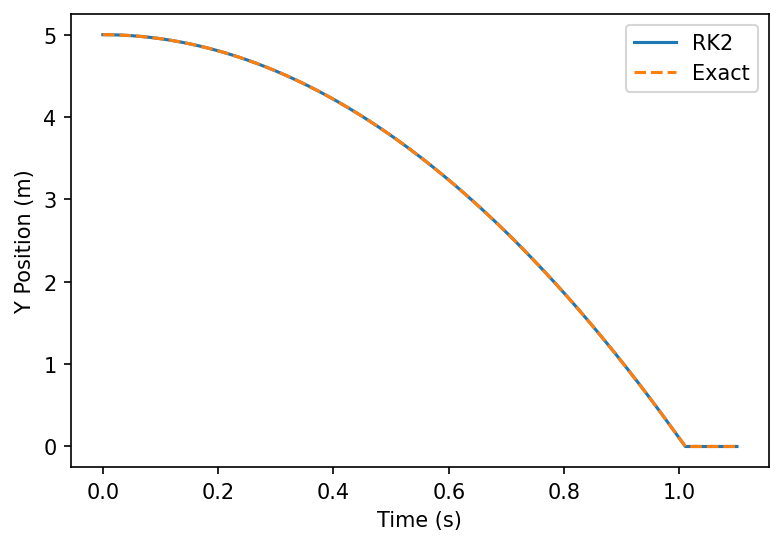

In [10]:
# Start with Euler method and modify to RK2
# Using lists
import numpy as np
import matplotlib.pyplot as plt

def v(y,t): # This is the function representing the ODE we're trying to solve
    return vy0 + ay*(t-t0)

# Variables defining simulation parameters
y0 = 5.0
t0 = 0.0
tf = 1.1
vy0 = 0.0
ay = -9.8
h = 0.0005 # time step in seconds

# Define data containers
tarr = np.arange(t0,tf+h,h)
yarr = []

# initialize y value for zeroth timestep
y = y0

for t in tarr:
    yarr.append(y)
    #y += h*v(y,t) # Generic x(t+delta_t)=x(t)+h*f(x,t) step for Euler method
    
    ##### RK2 method ##########
    k1 = h * v(y,t)
    k2 = h * v(y + 0.5*k1, t+0.5*h)
    y += k2
    #########################    
    if y<0: # Keep object from dropping through the ground
        y=0

#Calculate exact solution for comparison
y_th=y0 + vy0*(tarr-t0)+0.5*ay*(tarr-t0)**2
y_th[y_th<0]=0

plt.figure(dpi=150)
plt.plot(tarr,yarr)
plt.plot(tarr,y_th,'--')
plt.legend(['RK2','Exact'])
plt.xlabel('Time (s)')
plt.ylabel('Y Position (m)')  

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
Pre-generated solution:

In [ ]:
# Using lists
import numpy as np
import matplotlib.pyplot as plt

def velocity(y,t): # This is the function representing the ODE we're trying to solve
    return vy0 + ay*(t-t0)

# Variables defining simulation parameters
y0 = 0.0
t0 = 0.0
tf = 1.1
vy0 = 5.0
ay = -9.8
h = 0.02 # time step in seconds

# Define data containers
tarr = np.arange(t0,tf+h,h)
yarr = []

# initialize y value for zeroth timestep
y = y0

for t in tarr:
    yarr.append(y)
    #y += h*velocity(y,t) # Euler method
    ########### Implement the RK2 method ############
    k1 = h * velocity(y,t)  # Next three lines correspond to RK2 method
    k2 = h * velocity(y+0.5*k1, t + h/2)
    y += k2
    ################################################
    if y<0: # Keep object from dropping through the ground
        y=0

#Calculate exact solution for comparison
y_th=vy0*tarr+0.5*ay*tarr**2
y_th[y_th<0]=0
        
plt.plot(tarr,yarr)
plt.plot(tarr,y_th,'--')
plt.legend(['RK2','Exact'])
plt.xlabel('Time (s)')
plt.ylabel('Y Position (m)')  

<br><br><br><br><br><br><br><br><br><br><br><br><br>
## Euler vs RK2
If you take a look at the Taylor series used to justify the two approaches, we had
\begin{equation*} x(t+h) = x(t) + hf(x,t) + O(h^2) \end{equation*}
for the Euler method and
\begin{equation*} x(t+h) = x(t) + hf\left( x\left( t + \frac 12 h \right),t+\frac{1}{2}h \right) + O\left( h^3 \right) \end{equation*}
for the second-order Runge-Kutta method. 

This means that we neglected terms of order $O(h^2)$ in the Euler method and $O(h^3)$ in the second-order Runge-Kutta method. This illustrates that the RK2 method is going to more accurately represent the real solution than the Euler method because we're neglecting terms of a higher power in RK2 than in Euler.


<br><br><br><br><br><br><br><br><br><br><br><br><br>
## Higher-order Runge-Kutta methods
\begin{equation*} \frac{dx}{dt}=f(x,t) \end{equation*}
There are higher-order Runge-Kutta methods, and each brings greater accuracty at the expense of greater complexity in programming. Commonly, the fourth order Runge_kutta method is seen to be a good compromise. The equations for this process are:

\begin{equation*} \begin{aligned} k_1 & = hf(x,t) \\ 
k_2 & = hf \left( x + \frac{1}{2} k_1, t + \frac{1}{2} h \right) \\
k_3 & = hf \left( x + \frac{1}{2} k_2, t + \frac{1}{2} h \right) \\
k_4 & = hf \left( x + k_3, t + h \right) \\
x(t+h) & = x(t) + \frac{1}{6}\left( k_1 + 2k_2 + 2k_3 + k_4 \right) 
\end{aligned}\end{equation*}

Let's apply this to free-fall motion:

Text(0, 0.5, 'Y Position (m)')

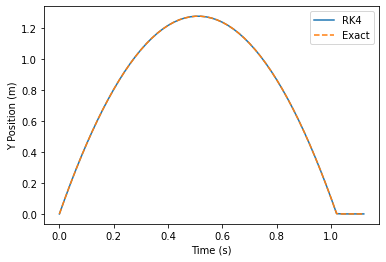

In [1]:
# Using lists
import numpy as np
import matplotlib.pyplot as plt

def v(y,t): # This is the function representing the ODE we're trying to solve
    fy = vy0 + ay*(t-t0)
    return fy

# Variables defining simulation parameters
y0 = 0.0
t0 = 0.0
tf = 1.1
vy0 = 5.0
ay = -9.8
h = 0.02 # time step in seconds

# Define data containers
tarr = np.arange(t0,tf+h,h)
yarr = []

# initialize y value for zeroth timestep
y = y0

for t in tarr:
    yarr.append(y)
   ###### Implement RK4 method ##############
    k1 = h * v(y,t)  # Next five lines correspond to RK4 method (the only lines that have changed!)
    k2 = h * v(y+0.5*k1, t+h/2)
    k3 = h * v(y+0.5*k2, t+h/2)
    k4 = h * v(y+k3, t+h)
    y += (k1+2*k2+2*k3+k4)/6
    ##########################################
    if y<0: # Keep object from dropping through the ground
        y=0

#Calculate exact solution for comparison
y_th=y0 + vy0*(tarr-t0)+0.5*ay*(tarr-t0)**2
y_th[y_th<0]=0
        
plt.plot(tarr,yarr)
plt.plot(tarr,y_th,'--')
plt.legend(['RK4','Exact'])
plt.xlabel('Time (s)')
plt.ylabel('Y Position (m)')  

<br><br><br><br><br><br><br><br><br><br><br>
## Example
We can use this method to solve any 1st-order ordinary differential equation. Let's consider

\begin{equation*} \frac{\mathrm{d}x}{\mathrm{d}t} = -x^3 + \mathrm{sin}(t) \end{equation*}

Starting at $x=0$ and for the interval $t=[0,10]$. 
* a) Use Euler's method to generate a plot using $N=1000$ terms
* b) Use RK2 to generate a numerical solution and plot it on the same axes as the Euler method solution.
* c) Use RK4 to generate a numerical solution and plot it on the same axes as the previous two solutions.
* d) Make $N$ progressively smaller to see further deviation between the methods.

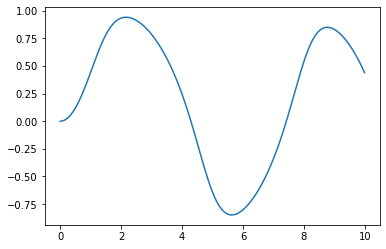

In [14]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(x,t):
    return -x**3 +math.sin(t)

t0 = 0.0     # starting value of t
tf = 10.0    # ending value of t
N = 1000    # number of steps
h = (tf-t0)/N # step size
x = 0.0     # initial condition for x

tpoints = np.arange(t0,tf,h) #Define time array in advance rather than calculating it for every time step

# EULER METHOD ===============
xpoints = []

for t in tpoints:
    xpoints.append(x)
    x += h*f(x,t)

plt.figure()
plt.plot(tpoints,xpoints)

<br><br><br><br><br><br><br><br><br><br><br><br><br>
### Pre-generated solution (all methods):

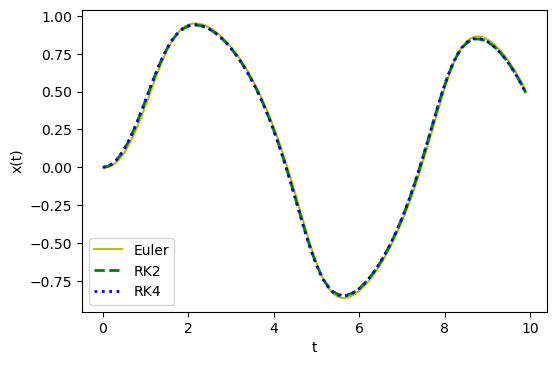

In [17]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(x,t):
    return -x**3 +math.sin(t)

a = 0.0     # starting value of t
b = 10.0    # ending value of t
N = 100    # number of steps
h = (b-a)/N # step size
x = 0.0     # initial condition for x


# EULER METHOD ===============
tpoints = np.arange(a,b,h)
xpoints = []
for t in tpoints:
    xpoints.append(x)
    x += h*f(x,t) # Euler method
    
plt.figure(dpi=100)
plt.plot(tpoints,xpoints,'y-')  
plt.xlabel('t')
plt.ylabel('x(t)')

# END EULER METHOD ===============

# RK2 METHOD ================================
Nrk = N
h = (b-a)/Nrk # step size
xrk = 0.0  

tpoints = np.arange(a,b,h)
xrkpoints = []
for t in tpoints:
    xrkpoints.append(xrk)
    ####### RK2 method ############
    k1 = h*f(xrk,t)
    k2 = h*f(xrk+0.5*k1,t+0.5*h)
    xrk += k2
    ##############################
    
plt.plot(tpoints,xrkpoints,'g--',lw=2)  # plot this on the same image

# RK4 METHOD ================================
Nrk4 = N
h = (b-a)/Nrk4 # step size
xrk4 = 0.0  

tpoints = np.arange(a,b,h)
xrk4points = []
for t in tpoints:
    xrk4points.append(xrk4)
    ##### RK4 method ###############
    k1 = h*f(xrk4,t)
    k2 = h*f(xrk4+0.5*k1,t+0.5*h)
    k3 = h*f(xrk4+0.5*k2,t+0.5*h)
    k4 = h*f(xrk4+k3,t+h)
    xrk4 += (k1+2*k2+2*k3+k4)/6
    ###############################
    
plt.plot(tpoints,xrk4points,'b:',lw=2)  # plot this on the same image
plt.legend(['Euler','RK2','RK4'])
plt.show()


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
## Student designed example

\begin{equation*} \frac{dw}{dt} = w^2+e^{t}\sin(t)\cos(w) \end{equation*}


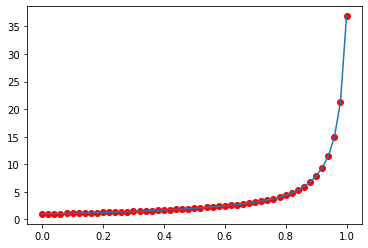

In [6]:
# Import
import numpy as np
import matplotlib.pyplot as plt

# Define function
def f(w,t):
    fw = (w**2) + np.exp(t)* np.sin(t) *np.cos(w)
    return fw

# Run parameters
w0 = 1.000
t0 = 0.0
tf = 1.0
h = 0.02

# Create lists and arrays
tpoints = np.arange(t0,tf+h,h)
wpoints = []

# Initialize variables that go into RK4
w = w0

# For loop to do RK4
for t in tpoints:
    # Append into solution list (w)
    wpoints.append(w)
    # RK4 
    k1 = h*f(w,t)
    k2 = h*f(w+0.5*k1,t+0.5*h)
    k3 = h*f(w+0.5*k2,t+0.5*h)
    k4 = h*f(w+k3,t+h)
    w += (k1+2*k2+2*k3+k4)/6    

# Plot results
plt.figure()
plt.plot(tpoints,wpoints)
plt.scatter(tpoints,wpoints,color='red')

\begin{equation*} \begin{aligned} k_1 & = hf(x,t) \\ 
k_2 & = hf \left( x + \frac{1}{2} k_1, t + \frac{1}{2} h \right) \\
k_3 & = hf \left( x + \frac{1}{2} k_2, t + \frac{1}{2} h \right) \\
k_4 & = hf \left( x + k_3, t + h \right) \\
x(t+h) & = x(t) + \frac{1}{6}\left( k_1 + 2k_2 + 2k_3 + k_4 \right) 
\end{aligned}\end{equation*} 